In [11]:
!pip install inference-sdk

  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 39.3 MB/s eta 0:00:00a 0:00:01
Using cached marshmallow-3.26.1-py3-none-any.whl (50 kB)
Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Using cached mypy_extensions-1.1.0-py3-none-any.whl (5.0 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0

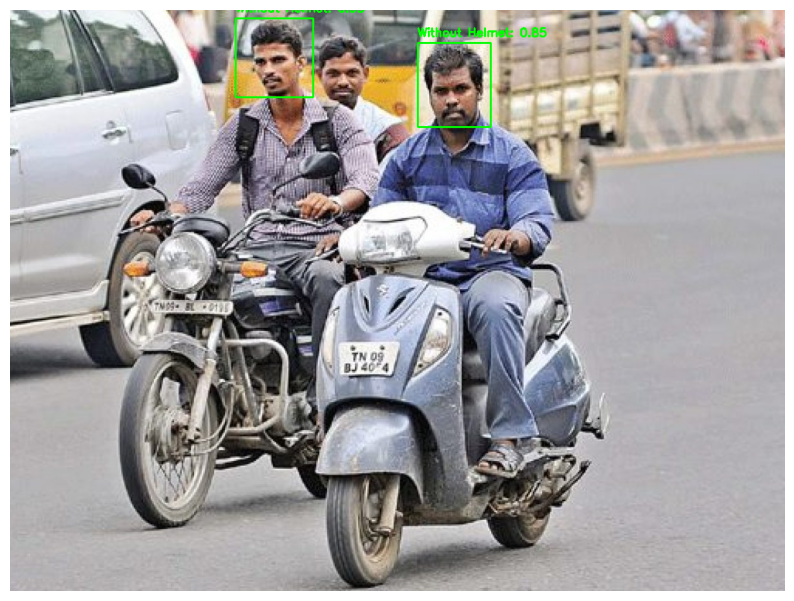

In [18]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="zvk9zaWxnlyi6jkKUbTR"
)

result = CLIENT.infer("/Users/saikalyansathish/Desktop/CAPSTONE PROJECT 2/Without-Helmet-1200x900.jpg", model_id="fullface-helmet-helmet-no-helmet-detection/1")

import cv2
import matplotlib.pyplot as plt

# Assuming you have already run inference and have the result in `result`
# And you have loaded the image as `image`
image = cv2.imread("/Users/saikalyansathish/Desktop/CAPSTONE PROJECT 2/Without-Helmet-1200x900.jpg")
if image is None:
    print("Image not loaded. Check the file path.")

# Draw bounding boxes and labels on the image
for prediction in result['predictions']:
    x1 = int(prediction['x'] - prediction['width'] / 2)
    y1 = int(prediction['y'] - prediction['height'] / 2)
    x2 = int(prediction['x'] + prediction['width'] / 2)
    y2 = int(prediction['y'] + prediction['height'] / 2)
    label = prediction['class']
    confidence = prediction['confidence']
    color = (0, 255, 0)  # Green box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, f"{label}: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [2]:
!pip install roboflow supervision opencv-python

  Using cached roboflow-1.1.64-py3-none-any.whl.metadata (9.7 kB)
  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached roboflow-1.1.64-py3-none-any.whl (85 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Using cached supervision-0.25.1-py3-none-any.whl (181 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 2.6 MB/s eta 0:00:0000:0100:01
Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
Using cached python_dotenv-1.1.0-py3-none-any.whl (20 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-no

In [3]:
from roboflow import Roboflow
import supervision as sv
import cv2

In [9]:
rf = Roboflow(api_key="zvk9zaWxnlyi6jkKUbTR")
project = rf.workspace().project("fullface-helmet-helmet-no-helmet-detection")
model = project.version(1).model

result = model.predict("/Users/saikalyansathish/Desktop/CAPSTONE PROJECT 2/WhatsApp Image 2025-05-14 at 17.39.13.jpeg", confidence=40, overlap=30).json()
labels = [item["class"] for item in result["predictions"]]
detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
box_annotator = sv.BoxAnnotator()

image = cv2.imread("your_image.jpg")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

loading Roboflow workspace...
loading Roboflow project...


[ WARN:0@467.959] global loadsave.cpp:241 findDecoder imread_('your_image.jpg'): can't open/read file: check file path/integrity


ValueError: Unsupported image type: <class 'NoneType'>